In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [61]:
from pathlib import Path
import pandas as pd

BASE_DIR = Path("projet").resolve().parent.parent  # dossier du script



data_file = BASE_DIR / "data" / "train.csv"

df = pd.read_csv(data_file)

In [62]:
df.shape

(215257, 102)

In [63]:
df.head()

,ID,NAME_CONTRACT_TYPE,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_4,TARGET
0,160132,Cash loans,F,N,Y,0,427500.0,1288350.0,37800.0,1125000.0,...,0,0,0.0,0.0,1.0,0.0,0.0,5.0,0.242982,0
1,233132,Cash loans,M,Y,Y,0,180000.0,848745.0,40963.5,675000.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.115508,0
2,307771,Cash loans,M,Y,Y,1,112500.0,385164.0,19795.5,292500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.393106,0
3,376452,Cash loans,F,N,Y,0,540000.0,1433520.0,60867.0,1237500.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.455985,0
4,405403,Cash loans,M,Y,Y,0,76500.0,900000.0,26316.0,900000.0,...,0,0,0.0,0.0,0.0,3.0,0.0,2.0,0.141508,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215257 entries, 0 to 215256
Columns: 102 entries, ID to TARGET
dtypes: float64(48), int64(40), object(14)
memory usage: 167.5+ MB


In [65]:
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

NONLIVINGAPARTMENTS_AVG       69.369637
NONLIVINGAPARTMENTS_MODE      69.369637
NONLIVINGAPARTMENTS_MEDI      69.369637
FLOORSMIN_MEDI                67.761327
FLOORSMIN_MODE                67.761327
FLOORSMIN_AVG                 67.761327
YEARS_BUILD_AVG               66.415959
YEARS_BUILD_MEDI              66.415959
YEARS_BUILD_MODE              66.415959
OWN_CAR_AGE                   65.945358
EXT_SOURCE_1                  56.311758
NONLIVINGAREA_MEDI            55.168938
NONLIVINGAREA_MODE            55.168938
NONLIVINGAREA_AVG             55.168938
ELEVATORS_AVG                 53.284214
ELEVATORS_MEDI                53.284214
ELEVATORS_MODE                53.284214
WALLSMATERIAL_MODE            50.802065
APARTMENTS_MODE               50.730058
APARTMENTS_MEDI               50.730058
APARTMENTS_AVG                50.730058
ENTRANCES_AVG                 50.336110
ENTRANCES_MEDI                50.336110
ENTRANCES_MODE                50.336110
LIVINGAREA_MODE               50.180482


In [66]:
missing.count()

np.int64(50)

In [67]:
columns_to_delete = missing[missing > 50].index

In [68]:
columns_to_delete

Index(['NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MEDI', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI',
       'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'ELEVATORS_AVG',
       'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'ENTRANCES_AVG',
       'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'LIVINGAREA_MODE',
       'LIVINGAREA_MEDI', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE'],
      dtype='object')

In [69]:
for i in columns_to_delete:
    df.drop(i, axis=1, inplace=True)

TARGET
0    197809
1     17448
Name: count, dtype: int64


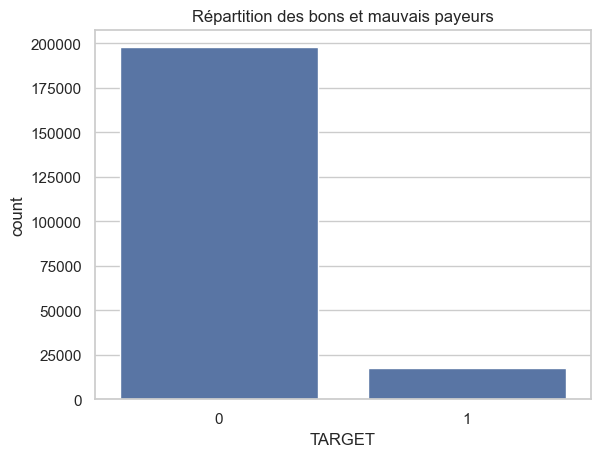

In [70]:
# Répartition des bons / mauvais payeurs
print(df['TARGET'].value_counts())
sns.countplot(x='TARGET', data=df)
plt.title("Répartition des bons et mauvais payeurs")
plt.show()


In [71]:
# Sélection des colonnes numériques
num_cols = df.select_dtypes(include=['int64','float64']).columns

# Statistiques descriptives
df[num_cols].describe()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_AGE,DAYS_EMPLOYMENT,DAYS_ID_PUBLISH,FLAG_MOBIL,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_4,TARGET
count,215257.000000,215257.000000,2.152570e+05,2.152570e+05,215249.000000,2.150540e+05,215257.000000,215257.000000,215257.000000,215257.0,...,215257.000000,215257.000000,186162.000000,186162.000000,186162.000000,186162.000000,186162.000000,186162.00000,2.147930e+05,215257.000000
mean,277916.285552,0.416567,1.683448e+05,5.996394e+05,27128.366938,5.388528e+05,-16040.968814,64138.989292,-2995.073206,1.0,...,0.000506,0.000330,0.006494,0.006935,0.034486,0.268175,0.265264,1.90107,2.571639e-01,0.081057
std,102805.880546,0.721898,1.023409e+05,4.030145e+05,14521.116795,3.699160e+05,4367.736464,141546.368713,1509.053098,0.0,...,0.022497,0.018158,0.084051,0.108859,0.203859,0.922865,0.860637,1.86733,1.850209e-01,0.272923
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-25201.000000,-17912.000000,-6383.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.436734e-08,0.000000
25%,188825.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,-19697.000000,-2758.000000,-4298.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,9.779965e-02,0.000000
50%,277695.000000,0.000000,1.462500e+05,5.155290e+05,24930.000000,4.500000e+05,-15756.000000,-1209.000000,-3257.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,2.257796e-01,0.000000
75%,366772.000000,1.000000,2.025000e+05,8.086500e+05,34605.000000,6.795000e+05,-12409.000000,-288.000000,-1722.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.00000,3.940680e-01,0.000000
max,456255.000000,19.000000,9.000000e+06,4.050000e+06,230161.500000,4.050000e+06,-7676.000000,365243.000000,0.000000,1.0,...,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.00000,8.059096e-01,1.000000


In [72]:
cat_cols = df.select_dtypes(include=['object']).columns

# Aperçu des premières valeurs
for col in cat_cols:
    print(col, df[col].nunique())
    print(df[col].value_counts().head())
    print("-----")


NAME_CONTRACT_TYPE 2
NAME_CONTRACT_TYPE
Cash loans         194990
Revolving loans     20267
Name: count, dtype: int64
-----
GENDER 3
GENDER
F      141713
M       73541
XNA         3
Name: count, dtype: int64
-----
FLAG_OWN_CAR 2
FLAG_OWN_CAR
N    141948
Y     73309
Name: count, dtype: int64
-----
FLAG_OWN_REALTY 2
FLAG_OWN_REALTY
Y    149273
N     65984
Name: count, dtype: int64
-----
NAME_TYPE_SUITE 7
NAME_TYPE_SUITE
Unaccompanied      173984
Family              28068
Spouse, partner      7982
Children             2292
Other_B              1239
Name: count, dtype: int64
-----
NAME_INCOME_TYPE 8
NAME_INCOME_TYPE
Working                 111213
Commercial associate     49950
Pensioner                38940
State servant            15113
Unemployed                  17
Name: count, dtype: int64
-----
NAME_EDUCATION_TYPE 5
NAME_EDUCATION_TYPE
Secondary / secondary special    152963
Higher education                  52270
Incomplete higher                  7214
Lower secondary                

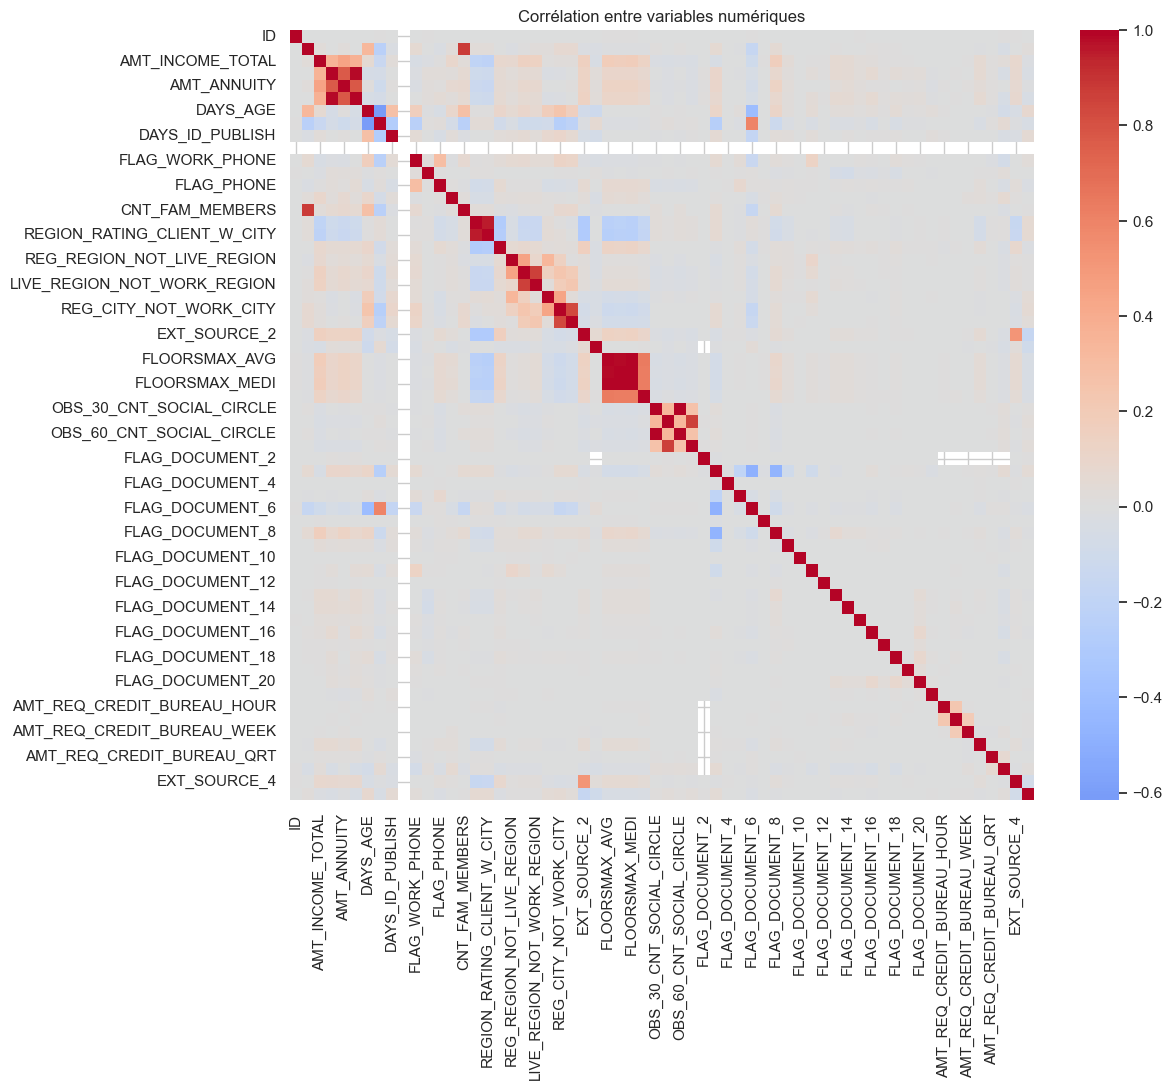

In [73]:
plt.figure(figsize=(12,10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Corrélation entre variables numériques")
plt.show()


In [74]:
df.columns.tolist()

['ID',
 'NAME_CONTRACT_TYPE',
 'GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_AGE',
 'DAYS_EMPLOYMENT',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLOORSMAX_AVG',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLA

In [75]:
df["NAME_CONTRACT_TYPE"].value_counts()

NAME_CONTRACT_TYPE
Cash loans         194990
Revolving loans     20267
Name: count, dtype: int64

In [76]:
pd.crosstab(df["NAME_CONTRACT_TYPE"], df["TARGET"])


TARGET,0,1
NAME_CONTRACT_TYPE,,
Cash loans,178644,16346
Revolving loans,19165,1102


In [77]:
df["FLAG_OWN_REALTY"].value_counts()

FLAG_OWN_REALTY
Y    149273
N     65984
Name: count, dtype: int64

In [78]:
df["AMT_INCOME_TOTAL"].describe()

count    2.152570e+05
mean     1.683448e+05
std      1.023409e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.462500e+05
75%      2.025000e+05
max      9.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [79]:
df["AMT_INCOME_TOTAL"].value_counts()

AMT_INCOME_TOTAL
135000.0    25004
112500.0    21729
157500.0    18569
180000.0    17261
90000.0     15696
            ...  
555327.0        1
297315.0        1
98158.5         1
112558.5        1
137880.0        1
Name: count, Length: 1964, dtype: int64

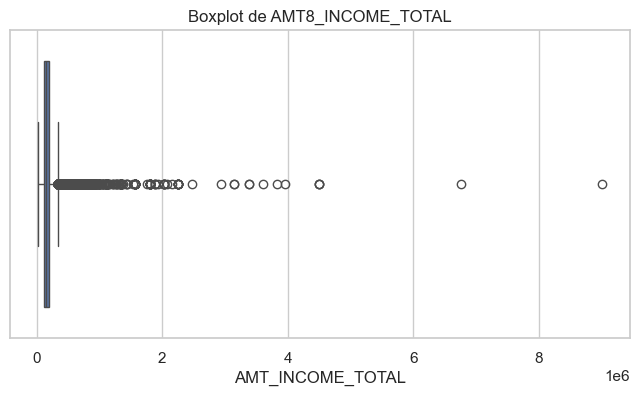

In [80]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["AMT_INCOME_TOTAL"])
plt.title(f'Boxplot de AMT8_INCOME_TOTAL')
plt.xlabel("AMT_INCOME_TOTAL")
plt.show()

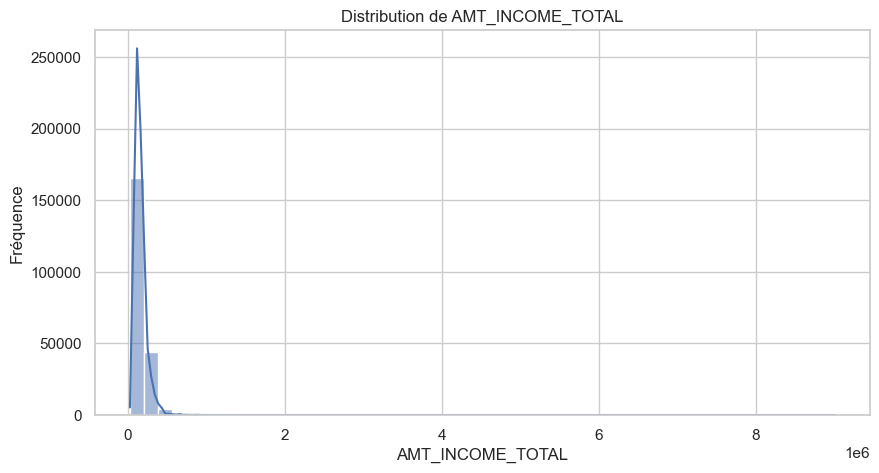

In [81]:
plt.figure(figsize=(10,5))
sns.histplot(df["AMT_INCOME_TOTAL"], bins=50, kde=True)  # kde=True ajoute la courbe de densité
plt.title(f'Distribution de AMT_INCOME_TOTAL')
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel('Fréquence')
plt.show()